In [1]:
from datetime import *

In [2]:
a = datetime.now()

In [3]:
a


datetime.datetime(2022, 5, 21, 13, 58, 46, 422111)

In [4]:
a.strftime("%d-%b-%y")

'21-May-22'

In [5]:
import pandas as pd
a = pd.date_range("22 April 2022", periods= 10, freq='D', tz="Asia/Jakarta")
a

DatetimeIndex(['2022-04-22 00:00:00+07:00', '2022-04-23 00:00:00+07:00',
               '2022-04-24 00:00:00+07:00', '2022-04-25 00:00:00+07:00',
               '2022-04-26 00:00:00+07:00', '2022-04-27 00:00:00+07:00',
               '2022-04-28 00:00:00+07:00', '2022-04-29 00:00:00+07:00',
               '2022-04-30 00:00:00+07:00', '2022-05-01 00:00:00+07:00'],
              dtype='datetime64[ns, Asia/Jakarta]', freq='D')

In [6]:
import warnings
import itertools
import numpy as np, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [7]:
import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [8]:
df = pd.read_csv("superstore.csv", encoding="ISO-8859-1", dtype={'Customer ID': str,'Order ID': str})
df['Order Date'] = pd.to_datetime(df['Order Date'])

# First 5 rows of the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
unique_values(df)

,Total,Uniques
Row ID,9994,9994
Order ID,9994,5009
Order Date,9994,1237
Ship Date,9994,1334
Ship Mode,9994,4
Customer ID,9994,793
Customer Name,9994,793
Segment,9994,3
Country,9994,1
City,9994,531


In [12]:
missing_data(df)

,Total,Percent
Profit,0,0.0
City,0,0.0
Order ID,0,0.0
Order Date,0,0.0
Ship Date,0,0.0
Ship Mode,0,0.0
Customer ID,0,0.0
Customer Name,0,0.0
Segment,0,0.0
Country,0,0.0


In [13]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3],
    y=[1.6, 1.6, 1.6, 1.6],
    mode="text", 
    text=["<span style='font-size:33px'><b>3</b></span>", 
          "<span style='font-size:33px'><b>3</b></span>",
          "<span style='font-size:33px'><b>49</b></span>",
          "<span style='font-size:33px'><b>56</b></span>"],
    textposition="bottom center"
))
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3],
    y=[1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["Segment", "Category", "State", "Country"],
    textposition="bottom center"
))
fig.add_hline(y=2.2, line_width=5, line_color='gray')
fig.add_hline(y=0.3, line_width=3, line_color='gray')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(showlegend=False, height=300, width=700, 
                  title='Store Sales Summary', title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,3.6], yaxis_range=[-0.2,2.2],
                  plot_bgcolor='#58d68d', paper_bgcolor='#58d68d',
                  font=dict(size=23, color='#212f3c'),
                  title_font=dict(size=35, color='#212f3c'),
                  margin=dict(t=90,l=70,b=0,r=70), 
    )

In [14]:
# data
df_seg_sa = df.groupby('Segment').agg({"Sales" : "mean"}).reset_index().sort_values(by='Sales', ascending=False)
df_cat_sa = df.groupby('Category').agg({"Sales" : "mean"}).reset_index().sort_values(by='Sales', ascending=False)[:10]
df_st_sa = df.groupby('State').agg({"Sales" : "mean"}).reset_index() 
# chart color
df_cat_sa['color'] = '#6c3483'
df_cat_sa['color'][2:] = '#a569bd'
df_st_sa['color'] = '#c6ccd8'

# chart
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Top Highest Product Sales", "Highest Sales in Stores", "City Vs Sales"))

fig.add_trace(go.Bar(x=df_cat_sa['Sales'], y=df_cat_sa['Category'], marker=dict(color= df_cat_sa['color']),
                     name='Category', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_seg_sa['Sales'], labels=df_seg_sa['Segment'], name='Segment',
                     marker=dict(colors=['#6c3483','#8e44ad','#a569bd','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=2)
fig.add_trace(go.Bar(x=df_st_sa['State'], y=df_st_sa['Sales'], 
                     marker=dict(color= df_st_sa['color']), name='State'), 
                     row=2, col=1)

# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_st_sa.State, ticktext=[i for i in range(1,17)], row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [15]:
#Forescasting Technology sales
tech = df.loc[df["Category"] == "Technology"]
tech.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,1/20/2016,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [16]:
tech["Order Date"].min()

Timestamp('2014-01-06 00:00:00')

In [17]:
tech["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [18]:
#Data Preprocessing
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
#tech.drop(cols, axis=1, inplace=True)
tech=tech.sort_values('Order Date')
tech.isnull().sum() #checking null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [19]:
tech = tech.groupby('Order Date')['Sales'].sum().reset_index() #Sum all sales according date
tech

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [20]:
#Indexing with time series data
tech=tech.set_index('Order Date')
tech.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [21]:
y = tech['Sales'].resample('MS').mean() #Resampling sales from day to months
y

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2

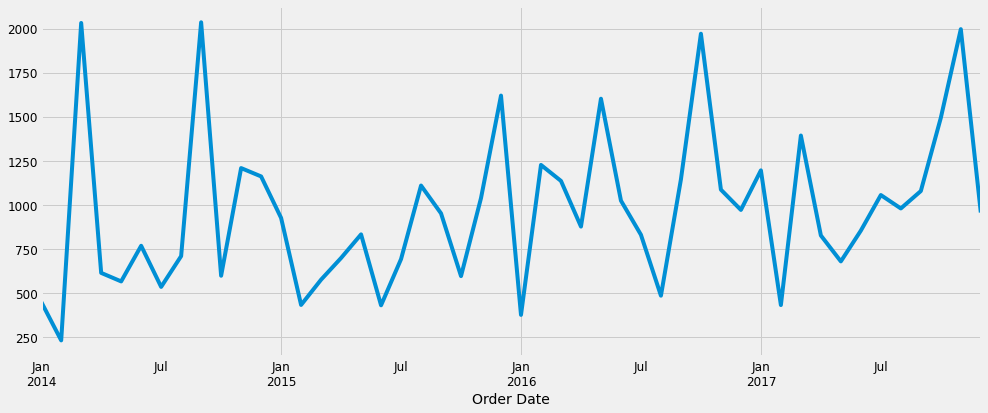

In [22]:
#visualizing furniture sales time series data
y.plot(figsize=(15,6))
plt.show()

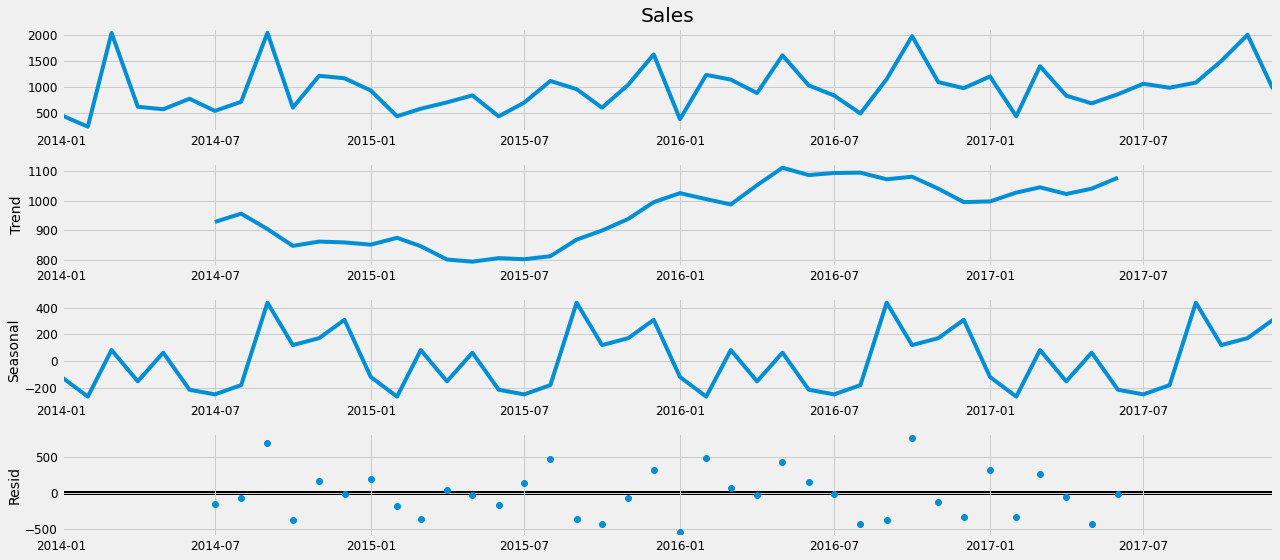

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y,model="additive")
fig = decomposition.plot()
plt.show()

In [24]:
x = tech['Sales'].resample('Q').sum()
x

Order Date
2014-03-31     37262.974
2014-06-30     27231.275
2014-09-30     47751.366
2014-12-31     63032.618
2015-03-31     18418.246
2015-06-30     29239.318
2015-09-30     44912.726
2015-12-31     70210.519
2016-03-31     39446.832
2016-06-30     60095.345
2016-09-30     45824.808
2016-12-31     80997.195
2017-03-31     56188.699
2017-06-30     43011.075
2017-09-30     67771.691
2017-12-31    104759.346
Freq: Q-DEC, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Order Date'>

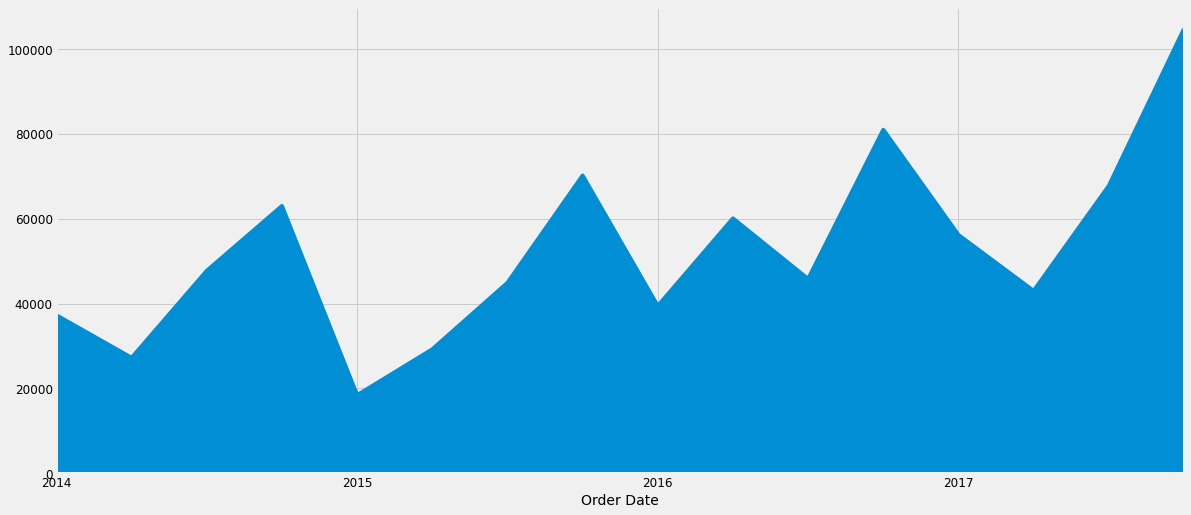

In [25]:
x.plot(kind="area")

In [26]:
p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print("SARIMAX:{} X {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} X {}".format(pdq[2],seasonal_pdq[2]))
print("SARIMAX:{} X {}".format(pdq[3],seasonal_pdq[3]))
print("SARIMAX:{} X {}".format(pdq[4],seasonal_pdq[4]))

SARIMAX:(0, 0, 1) X (0, 0, 1, 12)
SARIMAX:(0, 1, 0) X (0, 1, 0, 12)
SARIMAX:(0, 1, 1) X (0, 1, 1, 12)
SARIMAX:(1, 0, 0) X (1, 0, 0, 12)


In [27]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
            results = mod.fit()
            print("SARIMA{}x{}12-AIC:{}".format(param,param_seasonal,results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:791.4891765009955


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:1744.2312012625998
SARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:549.0156237882128
SARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:356.47255193987036
SARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:564.1031529698099
SARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:542.9210079120238
SARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:372.6612068172691
SARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:357.8845253700983
SARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:750.8969484750884


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:2801.3790219383745
SARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:535.0489454747246
SARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:341.1892359670105
SARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:566.0827904028271
SARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:526.5322595869083
SARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:373.87600658686284
SARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:342.6307363419486
SARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:729.3478530237927


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:1211.438893599678
SARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:562.7585880957716
SARIMA(0, 1, 0)x(0, 1, 1, 12)12-AIC:355.16661591453413
SARIMA(0, 1, 0)x(1, 0, 0, 12)12-AIC:543.3082156228088


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(1, 0, 1, 12)12-AIC:1310.8397767968759
SARIMA(0, 1, 0)x(1, 1, 0, 12)12-AIC:377.0354481434961
SARIMA(0, 1, 0)x(1, 1, 1, 12)12-AIC:357.14538297556754
SARIMA(0, 1, 1)x(0, 0, 0, 12)12-AIC:675.959989748357


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(0, 0, 1, 12)12-AIC:2361.8518209701497
SARIMA(0, 1, 1)x(0, 1, 0, 12)12-AIC:517.5329284811166
SARIMA(0, 1, 1)x(0, 1, 1, 12)12-AIC:325.1394965646323
SARIMA(0, 1, 1)x(1, 0, 0, 12)12-AIC:526.5542322434184


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(1, 0, 1, 12)12-AIC:1788.7156669493656
SARIMA(0, 1, 1)x(1, 1, 0, 12)12-AIC:359.5230842754469
SARIMA(0, 1, 1)x(1, 1, 1, 12)12-AIC:326.87694299705504
SARIMA(1, 0, 0)x(0, 0, 0, 12)12-AIC:742.0250351345342


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 0)x(0, 0, 1, 12)12-AIC:1756.0053028668715
SARIMA(1, 0, 0)x(0, 1, 0, 12)12-AIC:550.272134077019
SARIMA(1, 0, 0)x(0, 1, 1, 12)12-AIC:358.3250010024653
SARIMA(1, 0, 0)x(1, 0, 0, 12)12-AIC:543.2786122758231
SARIMA(1, 0, 0)x(1, 0, 1, 12)12-AIC:543.6875194363173
SARIMA(1, 0, 0)x(1, 1, 0, 12)12-AIC:359.37687065896336
SARIMA(1, 0, 0)x(1, 1, 1, 12)12-AIC:359.66762575105344
SARIMA(1, 0, 1)x(0, 0, 0, 12)12-AIC:699.8975570622566


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 1)x(0, 0, 1, 12)12-AIC:2710.085156095927
SARIMA(1, 0, 1)x(0, 1, 0, 12)12-AIC:536.8995751104089
SARIMA(1, 0, 1)x(0, 1, 1, 12)12-AIC:341.73604345955
SARIMA(1, 0, 1)x(1, 0, 0, 12)12-AIC:527.7942232814856


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 1)x(1, 0, 1, 12)12-AIC:513.0149371285517
SARIMA(1, 0, 1)x(1, 1, 0, 12)12-AIC:361.3149257974924
SARIMA(1, 0, 1)x(1, 1, 1, 12)12-AIC:343.43901681122077
SARIMA(1, 1, 0)x(0, 0, 0, 12)12-AIC:717.9677328156988


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(0, 0, 1, 12)12-AIC:1471.433758615792
SARIMA(1, 1, 0)x(0, 1, 0, 12)12-AIC:555.4581770800667
SARIMA(1, 1, 0)x(0, 1, 1, 12)12-AIC:352.88784627172197
SARIMA(1, 1, 0)x(1, 0, 0, 12)12-AIC:522.5042506796261


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(1, 0, 1, 12)12-AIC:1593.852833818501
SARIMA(1, 1, 0)x(1, 1, 0, 12)12-AIC:355.12595472757323
SARIMA(1, 1, 0)x(1, 1, 1, 12)12-AIC:354.8500621583803
SARIMA(1, 1, 1)x(0, 0, 0, 12)12-AIC:677.6306925348983


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(0, 0, 1, 12)12-AIC:1428.276782417363
SARIMA(1, 1, 1)x(0, 1, 0, 12)12-AIC:518.790371045422
SARIMA(1, 1, 1)x(0, 1, 1, 12)12-AIC:326.7008713657412
SARIMA(1, 1, 1)x(1, 0, 0, 12)12-AIC:513.1256895923925


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(1, 0, 1, 12)12-AIC:2024.309148086603
SARIMA(1, 1, 1)x(1, 1, 0, 12)12-AIC:343.6037335973416
SARIMA(1, 1, 1)x(1, 1, 1, 12)12-AIC:328.34839155681846


### Best  p d q

In [29]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0,1,1),seasonal_order=(0,1,1,12),
                               enforce_stationarity = False,
                               ecforce_invertibility = False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9994     14.727     -0.068      0.946     -29.864      27.865
ma.S.L12      -0.9926     14.612     -0.068      0.946     -29.631      27.646
sigma2      1.641e+05   7.98e-05   2.06e+09      0.000    1.64e+05    1.64e+05


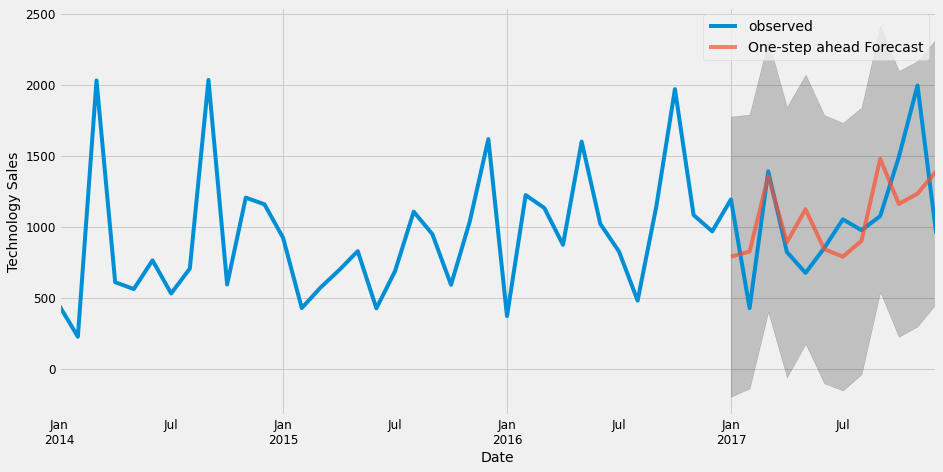

In [30]:
pred =results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha = 0.7, figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k', alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Technology Sales")
plt.legend()
plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y["2017-01-01":]
#Compute the mean square error
mse = ((y_forecasted-y_truth)**2).mean()
print("Mean squared error of forecast is {}".format(round(mse,2)))
print("Root Mean Squared error of forecast is {}".format(round(np.sqrt(mse),2)))

Mean squared error of forecast is 136958.75
Root Mean Squared error of forecast is 370.08


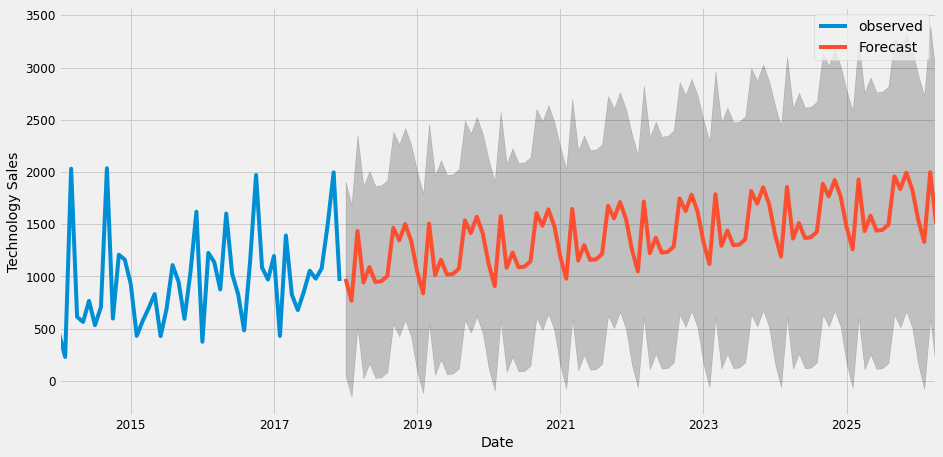

In [32]:
pred_uc =results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label="observed", figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k', alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Technology Sales")
plt.legend()
plt.show()

## MSE and RMSE is so high, Need to improve the model
